# 画像メディア工学６回目
## 6. 画像の復元と生成（ぼけ・ぶれ画像の復元）
### ライブラリの読み込み（おまじない）

In [11]:
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Google colaboratoryで利用する場合の画像のアップロード
img02.pngをアップしてください

In [12]:
# from google.colab import files
# uploaded_file = files.upload()

### 点拡がり関数の定義
以下の課題でも利用します

In [13]:
# 円の点拡がり関数
def calcPSF1( height, width, R):
    h=np.zeros((height, width), dtype=np.float32)
    cv2.circle(h, (int(h.shape[0]/2), int(h.shape[1]/2)), R, 255, -1, 8)
    sum_h = sum(h.flatten())
    return h/sum_h

# 直線の点拡がり関数
def calcPSF2(height, width, L, theta):
    h=np.zeros((height, width), dtype=np.float32)
    spx,spy = int(L/2*np.cos(theta/180*np.pi)+h.shape[0]/2), int(L/2*np.sin(theta/180*np.pi)+h.shape[1]/2)
    epx,epy = int(L/2*np.cos((theta+180)/180*np.pi)+h.shape[0]/2), int(L/2*np.sin((theta+180)/180*np.pi)+h.shape[1]/2)    
    cv2.line(h, (spx, spy), (epx, epy), 255, 1)
    sum_h = sum(h.flatten())
    return h/sum_h

### ウィーナーフィルタの定義

In [14]:
# ウィーナーフィルタ
def calcWnrFilter(h, g, gamma):
    fft_h = np.fft.fft2(h, s = g.shape)
    return fft_h/(np.abs(fft_h)**2 + gamma)

### 劣化画像（ぼけ画像）の生成
ここでは，劣化していない画像から，点拡がり関数を用いて劣化画像を生成することで，点拡がり関数の正解がわかる状況としている．

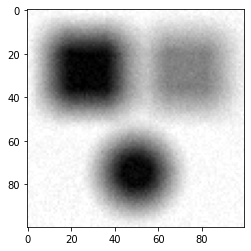

In [15]:
R = 10                            # 点拡がり関数の大きさ（半径）
img = cv2.imread('img02.png', 0)  # モノクロ画像として読み込み
h = calcPSF1(img.shape[0],img.shape[1], R)  # 円の点拡がり関数の作成
g = cv2.filter2D(img, -1, h) + np.random.normal(0,5, img.shape)    # 劣化画像の生成

plt.imshow(g, cmap='gray', vmin = 0, vmax = 255);

### ウィーナーフィルタを用いたぼけ画像の復元
　$f, F$: 原画像（復元画像）とそのフーリエ変換

　$g, G$: 劣化画像とそのフーリエ変換

　$h$: 点拡がり関数

　$K_w$: ウィーナーフィルタ

原画像のフーリエ変換 $F$が，$F = K_w G$で計算できる．

$R$(ぼけの大きさ）や$gamma$（画像とノイズの比率）を変化させると，復元結果が変化しますので，実際に値を変更し確認してみてください．

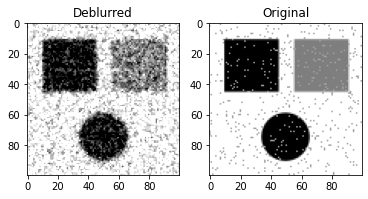

In [16]:
# 復元時点拡がり関数の作成
# この例では，点拡がり関数の正解がわかっているが，実際には不明のため，点拡がり関数を推定する必要があることに注意
R = 10
h = calcPSF1(g.shape[0], g.shape[1], R)

# ウィーナーフィルタの計算
gamma = 1/1000
Kw = calcWnrFilter(h, g, gamma);

# ウィーナーフィルタの適用
G = np.fft.fft2(g)
F = Kw*G

# フーリエ逆変換
f = np.fft.ifft2(F)
f = np.fft.fftshift(f)

# 復元結果の表示
plt.subplot(121)
plt.title('Deblurred')
plt.imshow(f.real, cmap='gray', vmin = 0, vmax = 255);
plt.subplot(122)
plt.title('Original')
plt.imshow(img, cmap='gray', vmin = 0, vmax = 255);

### 課題
１．以下の劣化画像を復元したいとき，どの点拡がり関数を利用すべきかを回答してください．

|画像1(img05a.png) |画像2(img05b.png) |
|:-|:-|
|<img src="https://github.com/yamazoe/ImageMediaProcessing/blob/main/img/img05a.png?raw=true" width=50%>|<img src="https://github.com/yamazoe/ImageMediaProcessing/blob/main/img/img05b.png?raw=true" width=50%>|

以下のプログラムにおいて，
- 画像の読み込み部分
- ウィーナーフィルタの適用における$gamma$の値，$F$の計算式
を修正すると劣化画像の復元が実行できますので，適切に修正してみてください．


２．以下の劣化画像を復元したい場合には，どのような点広がり関数を利用したらよいでしょうか？　文章で回答してください．

（例：画像１の場合であれば，斜め左上から右下方向に広がる点広がり関数，という回答）

<img src="https://github.com/yamazoe/ImageMediaProcessing/blob/main/img/img05c.png?raw=true" width=20%>

実行の前に，課題用のファイル（img05a.png,img05b.png）をアップしてください．

In [17]:
# from google.colab import files
# uploaded_file = files.upload()

処理を行う画像の読み込み
（いずれかをコメントアウトしてください）

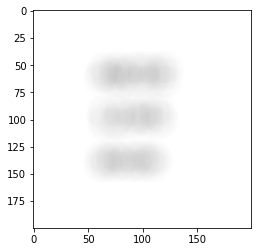

In [18]:
g = cv2.imread('img05a.png', 0)    
#g = cv2.imread('img05b.png', 0) 
plt.imshow(g, cmap='gray', vmin = 0, vmax = 255);

2種類の点拡がり関数の定義

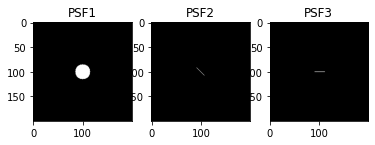

In [19]:
R = 15
L = 20
theta = 45
theta2 = 0
h0 = calcPSF1(g.shape[0], g.shape[1], 1)
h1 = calcPSF1(g.shape[0], g.shape[1], R)
h2 = calcPSF2(g.shape[0], g.shape[1], L, theta)
h3 = calcPSF2(g.shape[0], g.shape[1], L, theta2)

plt.subplot(131)
plt.title('PSF1')
plt.imshow(h1, cmap='gray');
plt.subplot(132)
plt.title('PSF2')
plt.imshow(h2, cmap='gray');
plt.subplot(133)
plt.title('PSF3')
plt.imshow(h3, cmap='gray');

ウィーナーフィルタの適用
- 画像に合わせて，gammaの値を設定してください
- 利用したいPSFによって，$F=H1*G$, または，$F=H2*G$ のいずれかを選択してください

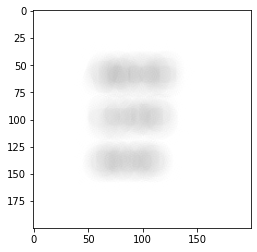

In [20]:
# img05aの場合，gammma=1/5000.
# img05bの場合，gammma=1/500.としてください
gamma = 1/5000. 
gamma = 1/500.  

H0 = calcWnrFilter(h0, g, gamma)
H1 = calcWnrFilter(h1, g, gamma)
H2 = calcWnrFilter(h2, g, gamma)
G = np.fft.fft2(g)
F = H0*G            # 正しくないPSFの場合
#F = H1*G           # PSF1を利用する場合
#F = H2*G           # PSF2を利用する場合
f = np.fft.ifft2(F)
f = np.fft.fftshift(f)

plt.imshow(f.real, cmap='gray', vmin = 0, vmax = 255);